In [16]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import math
from sklearn.preprocessing import OrdinalEncoder

# Some stuff

In [3]:
def my_PCA(X, k):
    """
    X: dataframe
        dataframe with n observation and p features (nxp)
    k: int
        number of principal components we want to project on
    output: array-shape
        return the projected data (nxk), where k is the number of principal components we have projected on
    """

    # center the data
    X_std = X - X.mean(axis=0)

    # compute the covariance matrix
    cov_mat = np.dot(X_std.T, X_std)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:,sorted_indices]
    
    top_k_eigvecs = sorted_eigvecs[:,:k]

    projection_matrix = top_k_eigvecs

    return np.dot(X, projection_matrix)

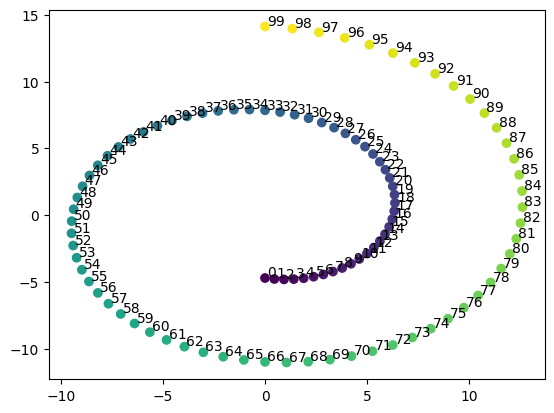

In [4]:
N = 100

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T

plt.scatter(x,y, c = phi)

_ = [plt.text(x[i]+0.1, y[i]+0.1, str(i)) for i in range(len(x))]

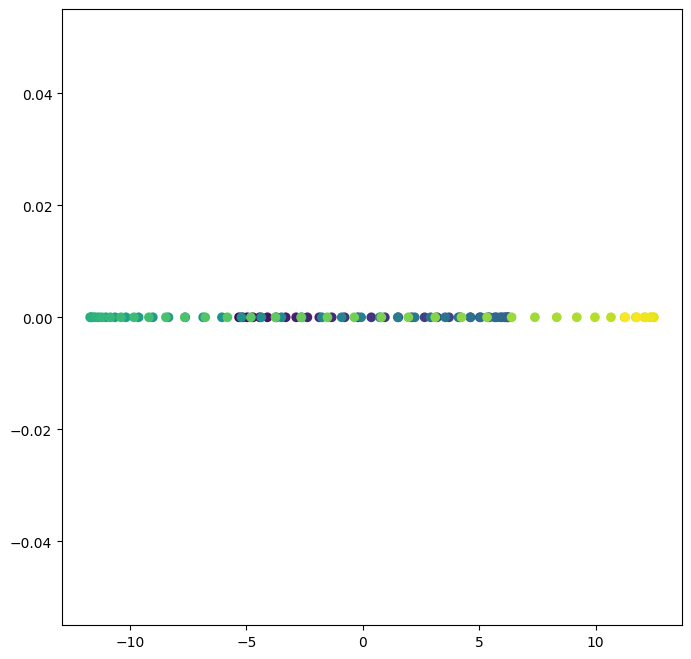

In [10]:
Y = PCA(1).fit_transform(X)
plt.figure(figsize=(8,8))
plt.scatter(Y[:,0], np.zeros(X.shape[0]), c = phi)

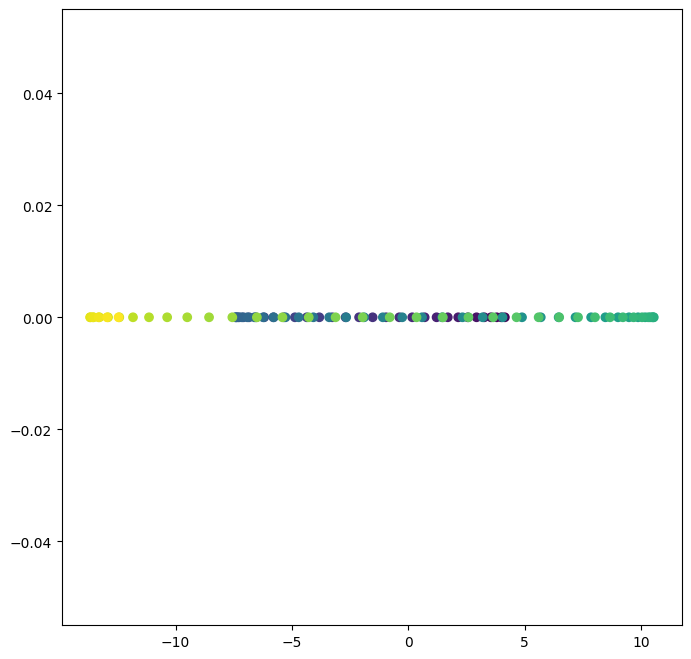

In [11]:
Y_ = my_PCA(X,1)

plt.figure(figsize=(8,8))
plt.scatter(Y_[:,0], np.zeros(X.shape[0]), c = phi)

# EX 1

In [17]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [18]:
y = df['Class']
X = df.drop('Class', axis=1)

In [20]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train =( X_train - X_train.mean())/X_train.std()